In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("dataset.csv")

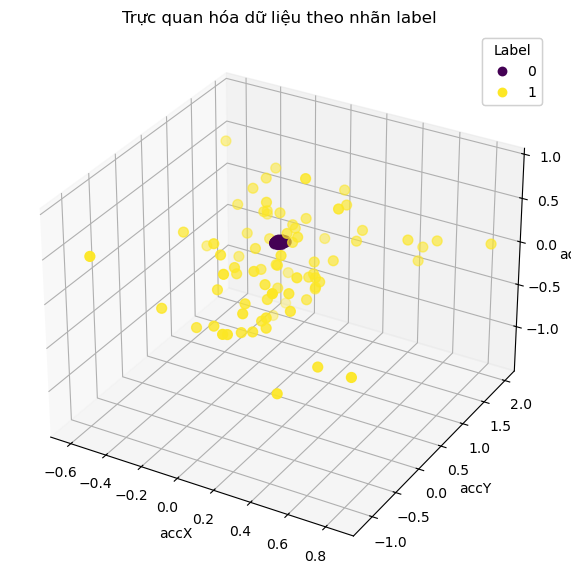

In [4]:
# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot với màu theo label
scatter = ax.scatter(df['accX'], df['accY'], df['accZ'], c=df['label'], cmap='viridis', s=50)

# Gán nhãn trục
ax.set_xlabel('accX')
ax.set_ylabel('accY')
ax.set_zlabel('accZ')
ax.set_title('Trực quan hóa dữ liệu theo nhãn label')

# Thêm chú thích màu
legend1 = ax.legend(*scatter.legend_elements(), title="Label")
ax.add_artist(legend1)

plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

c:\Users\PC DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


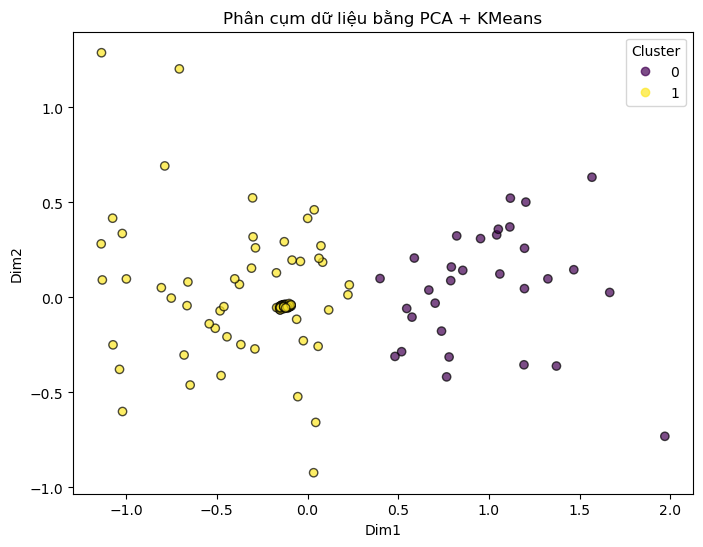

In [10]:
# Giảm chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['accX', 'accY', 'accZ']])

# Áp dụng KMeans để phân cụm (giả sử có 2 cụm)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[['accX', 'accY', 'accZ']])

# Tạo DataFrame mới để trực quan hóa
df_vis = pd.DataFrame(df_pca, columns=['Dim1', 'Dim2'])
df_vis['cluster'] = df['cluster']

# Vẽ scatter plot 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_vis['Dim1'], df_vis['Dim2'], c=df_vis['cluster'], cmap='viridis', alpha=0.7, edgecolors='k')

# Thêm legend
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel('Dim1')
plt.ylabel('Dim2')
plt.title('Phân cụm dữ liệu bằng PCA + KMeans')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")

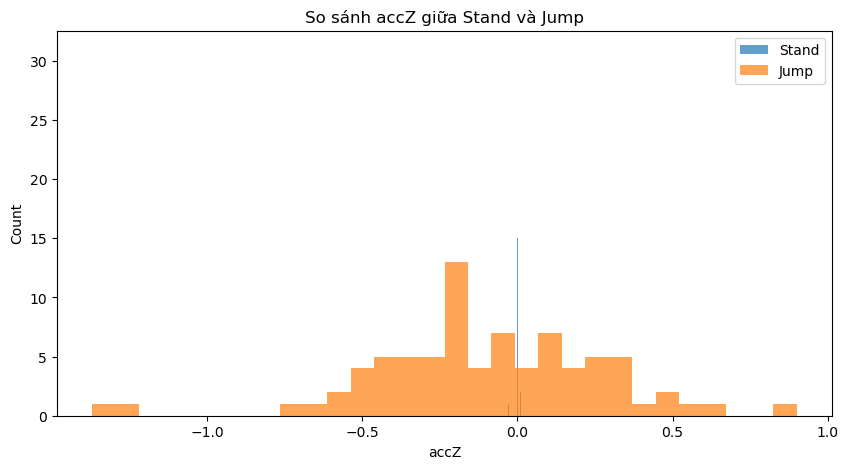

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['label'] == 0]['accZ'], bins=30, alpha=0.7, label='Stand')
plt.hist(df[df['label'] == 1]['accZ'], bins=30, alpha=0.7, label='Jump')
plt.xlabel("accZ")
plt.ylabel("Count")
plt.title("So sánh accZ giữa Stand và Jump")
plt.legend()
plt.show()